In [41]:
import pandas as pd
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
import os
import cv2 
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Reshape, Conv2DTranspose, Lambda

In [42]:
def load_images_from_folder(folder):
    images = []
    files = os.listdir(folder)
    visible_files = [f for f in files if not f.startswith('.')] # filter out all the hidden files 
    visible_files.sort()
    print(visible_files)
    for filename in visible_files:
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img2 = img.astype(np.float32)
            img3 = img2 / 255
            img4 = tf.image.resize_with_crop_or_pad(img3, 512, 512)
            images.append(img4)
    images = np.array(images)
    return images

In [43]:
images = load_images_from_folder("/Users/justinli/Desktop/GumbelSoftMax/images")
labels = load_images_from_folder("/Users/justinli/Desktop/GumbelSoftMax/labels")

['image01.png', 'image02.png', 'image03.png', 'image04.png', 'image05.png', 'image06.png', 'image07.png', 'image08.png', 'image09.png', 'image10.png', 'image11.png', 'image12.png', 'image13.png', 'image14.png', 'image15.png', 'image16.png', 'image17.png', 'image18.png', 'image19.png', 'image20.png', 'image21.png', 'image22.png', 'image23.png', 'image24.png', 'image25.png', 'image26.png', 'image27.png', 'image28.png', 'image29.png', 'image30.png', 'image31.png', 'image32.png']
['image01_mask.png', 'image02_mask.png', 'image03_mask.png', 'image04_mask.png', 'image05_mask.png', 'image06_mask.png', 'image07_mask.png', 'image08_mask.png', 'image09_mask.png', 'image10_mask.png', 'image11_mask.png', 'image12_mask.png', 'image13_mask.png', 'image14_mask.png', 'image15_mask.png', 'image16_mask.png', 'image17_mask.png', 'image18_mask.png', 'image19_mask.png', 'image20_mask.png', 'image21_mask.png', 'image22_mask.png', 'image23_mask.png', 'image24_mask.png', 'image25_mask.png', 'image26_mask.png'

In [44]:
test_images = images[30:]
test_labels = labels[30:]
images = images[0:30]
labels = labels[0:30]

In [45]:
print(np.shape(images))
print(np.shape(labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(30, 512, 512, 3)
(30, 512, 512, 3)
(2, 512, 512, 3)
(2, 512, 512, 3)


In [46]:
def one_zero_pixels(images):
    tmp_list = []
    for i in range(images.shape[0]):
        tmp = np.where(images[i] > 0, 1.0, 0.0)
        tmp_list.append(tmp)
    tmp_list = np.array(tmp_list)
    return tmp_list

In [47]:
labels_converted = one_zero_pixels(labels)
test_labels_converted = one_zero_pixels(test_labels)

In [48]:
print(labels_converted.shape)
print(test_labels_converted.shape)

(30, 512, 512, 3)
(2, 512, 512, 3)


In [49]:
def moving_average(data, window_size):
    cumsum = np.cumsum(np.insert(data, 0, 0))
    return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

In [50]:
input_shape = (512, 512, 3)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding = 'same'))

model.add(Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same', activation='relu'))
model.add(Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same', activation='relu'))
model.add(Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu'))
model.add(Conv2DTranspose(3, (2, 2), strides=(2, 2), padding='same'))

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 512, 512, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 256, 256, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 256, 256, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 128)     

In [51]:
history = model.fit(images, labels_converted, epochs=50, batch_size=1, validation_split=0.2, validation_batch_size=1, verbose = 0)

2023-12-02 22:23:50.035320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-02 22:23:55.530750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [69]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_79935/575839871.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, moving_average(y1, 10), '-ok', color='black', label = "train_loss")
/var/folders/4h/dwdjsw5n1ln0ngs7nflp8q2h0000gn/T/ipykernel_79935/575839871.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, moving_average(y2, 10), '-ok', color='red', label = "vlad_loss")


Text(0.5, 1.0, 'Training Errors')

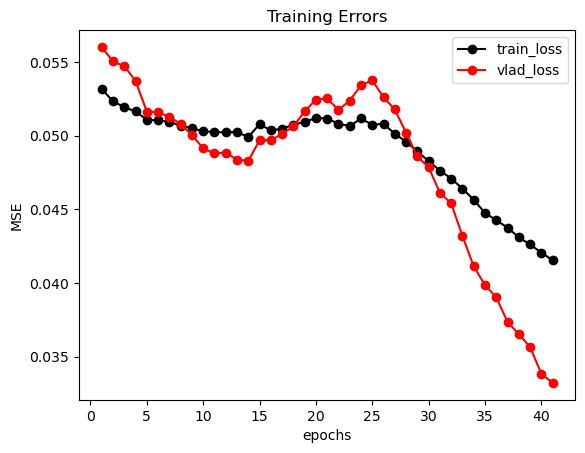

In [73]:
y1 = np.array(history.history['mean_squared_error'])
y2 = np.array(history.history['val_mean_squared_error'])
x = np.arange(41)
x = x+1
plt.plot(x, moving_average(y1, 10), '-ok', color='black', label = "train_loss")
plt.plot(x, moving_average(y2, 10), '-ok', color='red', label = "vlad_loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.title("Training Errors")

In [71]:
test1 = np.expand_dims(images[0], axis = 0)
prediction1 = model.predict(test1)

1/1 [==============================] - 0s 20ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


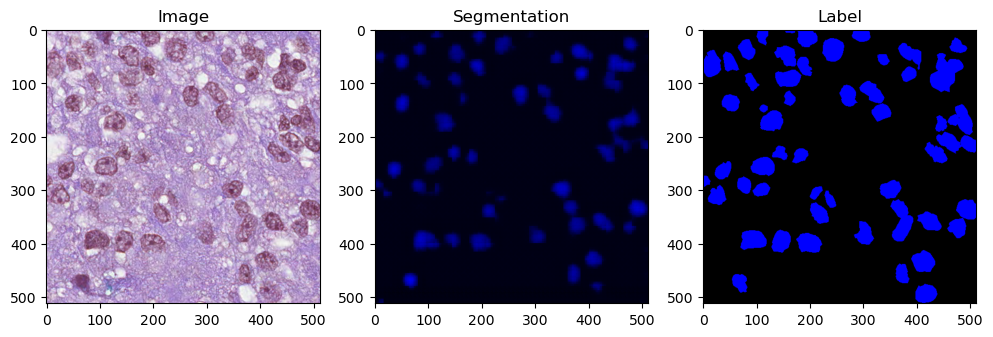

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.imshow(images[0])
ax2.imshow(prediction1[0])
ax3.imshow(labels_converted[0])
ax1.set_title('Image')
ax2.set_title('Segmentation')
ax3.set_title('Label')
# fig.suptitle('Batch_size = 2, Epoch = 1000')
fig.subplots_adjust(top = 1.17)

In [63]:
test2 = np.expand_dims(images[2], axis = 0)
prediction2 = model.predict(test2)

1/1 [==============================] - 0s 19ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


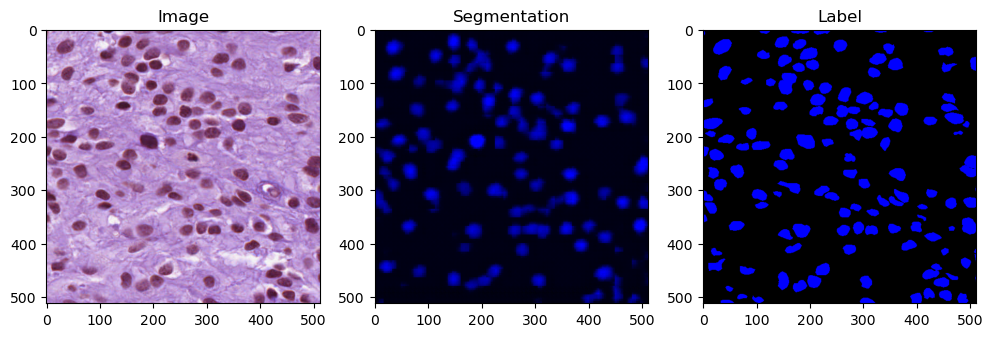

In [67]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.imshow(images[2])
ax2.imshow(prediction2[0])
ax3.imshow(labels_converted[2])
ax1.set_title('Image')
ax2.set_title('Segmentation')
ax3.set_title('Label')
# fig.suptitle('Batch_size = 2, Epoch = 1000')
fig.subplots_adjust(top = 1.17)

In [21]:
input_shape = (512, 512, 3)
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding = 'same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding = 'same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding = 'same'))

model2.add(Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same', activation='relu'))
model2.add(Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same', activation='relu'))
model2.add(Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu'))
model2.add(Conv2DTranspose(3, (2, 2), strides=(2, 2), padding='same'))

model2.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 512, 512, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 256, 256, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 128)     

In [22]:
history2 = model2.fit(images, labels_converted, epochs=500, batch_size=1, validation_split=0.2, validation_batch_size=1, verbose = 0)

2023-06-26 13:36:39.077557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-06-26 13:36:40.991393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [ ]:
y1_BCE = np.array(history2.history['accuracy'])
y2_BCE = np.array(history2.history['val_accuracy'])
x = np.arange(491)
x = x+1
plt.plot(x, moving_average(y1_BCE, 10), '-ok', color='black', label = "train_accuracy")
plt.plot(x, moving_average(y2_BCE, 10), '-ok', color='red', label = "vlad_accuracy")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.title("Training Errors")

In [ ]:
prediction1 = model2.predict(np.expand_dims(test_images[0], axis=0))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.imshow(test_images[0])
ax2.imshow(prediction1[0])
ax3.imshow(test_labels_converted[0])
ax1.set_title('Image')
ax2.set_title('Segmentation')
ax3.set_title('Label')
fig.suptitle('Batch_size = 2, Epoch = 1000')
fig.subplots_adjust(top = 1.17)

In [ ]:
prediction2 = model2.predict(np.expand_dims(test_images[1], axis=0))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.imshow(test_images[1])
ax2.imshow(prediction2[0])
ax3.imshow(test_labels_converted[1])
ax1.set_title('Image')
ax2.set_title('Segmentation')
ax3.set_title('Label')
fig.suptitle('Batch_size = 2, Epoch = 1000')
fig.subplots_adjust(top = 1.17)
500*500*3

In [ ]:
prediction3 = model2.predict(np.expand_dims(images[1], axis=0))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.imshow(images[1])
ax2.imshow(prediction3[0])
ax3.imshow(labels_converted[1])
ax1.set_title('Image')
ax2.set_title('Segmentation')
ax3.set_title('Label')
fig.suptitle('Batch_size = 2, Epoch = 1000')
fig.subplots_adjust(top = 1.17)

In [ ]:
def sample_gumbel(shape, eps=1e-20): 
  """Sample from Gumbel(0, 1)"""
  U = tf.random.uniform(shape,minval=0,maxval=1)
  return -tf.math.log(-tf.math.log(U + eps) + eps)

def gumbel_softmax_sample(logits, temperature): 
  """ Draw a sample from the Gumbel-Softmax distribution"""
  y = logits + sample_gumbel(tf.shape(logits))
  return tf.nn.softmax( y / temperature)

def gumbel_softmax(logits, temperature=1, hard=False):
  """Sample from the Gumbel-Softmax distribution and optionally discretize.
  Args:
    logits: [batch_size, n_class] unnormalized log-probs
    temperature: non-negative scalar
    hard: if True, take argmax, but differentiate w.r.t. soft sample y
  Returns:
    [batch_size, n_class] sample from the Gumbel-Softmax distribution.
    If hard=True, then the returned sample will be one-hot, otherwise it will
    be a probabilitiy distribution that sums to 1 across classes
  """
  y = gumbel_softmax_sample(logits, temperature)
  print(logits.shape)
  if hard:
    k = tf.shape(logits)[-1]
    #y_hard = tf.cast(tf.one_hot(tf.argmax(y,1),k), y.dtype)
    y_hard = tf.cast(tf.equal(y,tf.reduce_max(y,1,keep_dims=True)),y.dtype)
    y = tf.stop_gradient(y_hard - y) + y
  print(y.shape)
  return y

In [ ]:
input_shape = (512, 512, 3)
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3), padding = 'same', input_shape=input_shape, activation='relu'))
# model3.add(Lambda(gumbel_softmax))
# model3.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model3.add(Conv2D(64, kernel_size=(3, 3), padding = 'same', activation='relu'))
# model3.add(Lambda(gumbel_softmax))
# model3.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model3.add(Conv2D(128, kernel_size=(3, 3), padding = 'same', activation='relu'))
# model3.add(Lambda(gumbel_softmax))
# model3.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model3.add(Conv2D(256, kernel_size=(3, 3), padding = 'same', activation='relu'))
# model3.add(Lambda(gumbel_softmax))
# model3.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model3.add(Conv2D(3, kernel_size=(3, 3), padding = 'same'))
model3.add(Lambda(gumbel_softmax))


"""
model3.add(Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same', activation='relu'))
# model3.add(Lambda(gumbel_softmax))
model3.add(Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same', activation='relu'))
# model3.add(Lambda(gumbel_softmax))
model3.add(Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu'))
# model3.add(Lambda(gumbel_softmax))
model3.add(Conv2DTranspose(3, (2, 2), strides=(2, 2), padding='same'))
"""

model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model3.summary()

In [ ]:
history3 = model3.fit(images, labels_converted, epochs=500, batch_size=1, validation_split=0.2, validation_batch_size=1, verbose = 0)

In [ ]:
y1_Gumbel = np.array(history3.history['accuracy'])
y2_Gumbel = np.array(history3.history['val_accuracy'])
x = np.arange(491)
x = x+1
plt.plot(x, moving_average(y1_Gumbel, 10), '-ok', color='black', label = "train_accuracy")
plt.plot(x, moving_average(y2_Gumbel, 10), '-ok', color='red', label = "vlad_accuracy")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Training Errors")

In [ ]:
prediction1 = model3.predict(np.expand_dims(test_images[0], axis=0))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.imshow(test_images[0])
ax2.imshow(prediction1[0])
ax3.imshow(test_labels_converted[0])
ax1.set_title('Image')
ax2.set_title('Segmentation')
ax3.set_title('Label')

In [ ]:
prediction2 = model3.predict(np.expand_dims(test_images[1], axis=0))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.imshow(test_images[1])
ax2.imshow(prediction2[0])
ax3.imshow(test_labels_converted[1])
ax1.set_title('Image')
ax2.set_title('Segmentation')
ax3.set_title('Label')

In [ ]:
prediction3 = model3.predict(np.expand_dims(images[1], axis=0))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.imshow(images[1])
ax2.imshow(prediction3[0])
ax3.imshow(labels_converted[1])
ax1.set_title('Image')
ax2.set_title('Segmentation')
ax3.set_title('Label')

In [ ]:
prediction3[0]

In [ ]:
tmp = np.where(prediction3[0] > 0.9, 1.0, 0.0)
plt.imshow(tmp)

In [ ]:
def gumbel_cross_entropy(label, pred):
    """Calculate the Gumbel CrossEntropy loss.
    Args:
        pred (torch.Tensor): The prediction.
        label (torch.Tensor): one-hot encoded
    Returns:
        torch.Tensor: The calculated loss.
    """
    pred = tf.clip_by_value(pred, clip_value_min=-4, clip_value_max=10)
    pestim = 1/(tf.math.exp(tf.math.exp(-(pred))))
    loss = tf.keras.losses.BinaryCrossentropy()(pestim, label)
    loss = tf.clip_by_value(loss, clip_value_min=0, clip_value_max=20)

    return loss

In [ ]:
def sample_gumbel(shape, eps=1e-20):
    """Sample Gumbel noise."""
    U = tf.random.uniform(shape, minval=0, maxval=1)
    return -tf.math.log(-tf.math.log(U + eps) + eps)

def gumbel_softmax(logits, temperature):
    """Compute the Gumbel-Softmax."""
    gumbel_noise = sample_gumbel(tf.shape(logits))
    y = logits + gumbel_noise
    return tf.nn.softmax(y / temperature)

def hard_gumbel_softmax(logits, temperature=1): # 5
    """Compute the hard Gumbel-Softmax."""
    y_soft = gumbel_softmax(logits, temperature)
    k = tf.shape(logits)[-1]
    print(f"this is k: {k}")
    y_hard = tf.one_hot(tf.argmax(y_soft, -1), k)
    final = tf.stop_gradient(y_hard - y_soft) + y_soft
    return final


input_shape = (512, 512, 3)
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3), padding = 'same', input_shape=input_shape, activation='relu'))
# model3.add(Lambda(gumbel_softmax))
# model3.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model4.add(Conv2D(64, kernel_size=(3, 3), padding = 'same', activation='relu'))
# model3.add(Lambda(gumbel_softmax))
# model3.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model4.add(Conv2D(128, kernel_size=(3, 3), padding = 'same', activation='relu'))
# model3.add(Lambda(gumbel_softmax))
# model3.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model4.add(Conv2D(256, kernel_size=(3, 3), padding = 'same', activation='relu'))
# model3.add(Lambda(gumbel_softmax))
# model3.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model4.add(Conv2D(3, kernel_size=(3, 3), padding = 'same'))
model4.add(Lambda(hard_gumbel_softmax))

# we are predicting discrete labels (0,1) for segmentation 
# gumbel-softmax are good at learning discrete labels and allow gradients to flow smoothly 
# in CNN with softmax activation, we are predicting probabilities 


model4.compile(optimizer='adam',
              loss=keras.losses.KLDivergence(), #  double check the loss 
              metrics=['accuracy'])


model4.summary()

In [ ]:
history4 = model4.fit(images, labels_converted, epochs=500, batch_size=1, validation_split=0.2, validation_batch_size=1, verbose = 0)

In [ ]:
y1_Gumbel_hard = np.array(history4.history['accuracy'])
y2_Gumbel_hard = np.array(history4.history['val_accuracy'])
x = np.arange(491)
x = x+1
plt.plot(x, moving_average(y1_Gumbel_hard, 10), '-ok', color='black', label = "train_accuracy")
plt.plot(x, moving_average(y2_Gumbel_hard, 10), '-ok', color='red', label = "vlad_accuracy")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Training Errors")

In [ ]:
prediction1 = model4.predict(np.expand_dims(test_images[0], axis=0))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.imshow(test_images[0])
ax2.imshow(prediction1[0])
ax3.imshow(test_labels_converted[0])
ax1.set_title('Image')
ax2.set_title('Segmentation')
ax3.set_title('Label')

In [ ]:
prediction2 = model4.predict(np.expand_dims(test_images[1], axis=0))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.imshow(test_images[1])
ax2.imshow(prediction2[0])
ax3.imshow(test_labels_converted[1])
ax1.set_title('Image')
ax2.set_title('Segmentation')
ax3.set_title('Label')

In [ ]:
prediction3 = model4.predict(np.expand_dims(images[1], axis=0))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.imshow(images[1])
ax2.imshow(prediction3[0])
ax3.imshow(labels_converted[1])
ax1.set_title('Image')
ax2.set_title('Segmentation')
ax3.set_title('Label')

In [ ]:
input_shape = (512, 512, 3)
model5 = Sequential()
model5.add(Conv2D(32, kernel_size=(3, 3), padding = 'same', input_shape=input_shape, activation='relu'))
# model3.add(Lambda(gumbel_softmax))
# model3.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model5.add(Conv2D(64, kernel_size=(3, 3), padding = 'same', activation='relu'))
# model3.add(Lambda(gumbel_softmax))
# model3.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model5.add(Conv2D(128, kernel_size=(3, 3), padding = 'same', activation='relu'))
# model3.add(Lambda(gumbel_softmax))
# model3.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model5.add(Conv2D(256, kernel_size=(3, 3), padding = 'same', activation='relu'))
# model3.add(Lambda(gumbel_softmax))
# model3.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model5.add(Conv2D(3, kernel_size=(3, 3), padding = 'same'))
model5.add(Lambda(hard_gumbel_softmax))

# we are predicting discrete labels (0,1) for segmentation 
# gumbel-softmax are good at learning discrete labels and allow gradients to flow smoothly 
# in CNN with softmax activation, we are predicting probabilities 


model5.compile(optimizer='adam',
              loss=gumbel_cross_entropy, #  double check the loss 
              metrics=['accuracy'])


model5.summary()

In [ ]:
history5 = model5.fit(images, labels_converted, epochs=500, batch_size=1, validation_split=0.2, validation_batch_size=1, verbose = 0)

In [ ]:
y2_Gumbel_hard_Gumbel_loss = np.array(history5.history['val_accuracy'])

In [ ]:
y1_Gumbel_hard = np.array(history4.history['accuracy'])
y2_Gumbel_hard = np.array(history4.history['val_accuracy'])
x = np.arange(491)
x = x+1
plt.plot(x, moving_average(y2, 10), '-ok', color='black', label = "CNN with MSE")
plt.plot(x, moving_average(y2_BCE, 10), '-ok', color='red', label = "CNN with binary_cross_entropy")
plt.plot(x, moving_average(y2_Gumbel, 10), '-ok', color='green', label = "soft Gumbel with binary_cross_entropy")
plt.plot(x, moving_average(y2_Gumbel_hard, 10), '-ok', color='blue', label = "hard Gumbel with KL_Divergence")
plt.plot(x, moving_average(y2_Gumbel_hard_Gumbel_loss, 10), '-ok', color='pink', label = "hard Gumbel Gumbel loss")
plt.legend(loc="best")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Model Comparison (Validation Accuracy)")

In [15]:
import openslide
import numpy as np
import matplotlib.pyplot as plt

slide = openslide.OpenSlide('/Users/justinli/Downloads/TCGA-BH-A0B5-01Z-00-DX1.742DB0E8-8EB1-47C8-B698-8E2438FB6299.svs')
print("Dimensions: ", slide.dimensions)

Dimensions:  (106573, 76215)


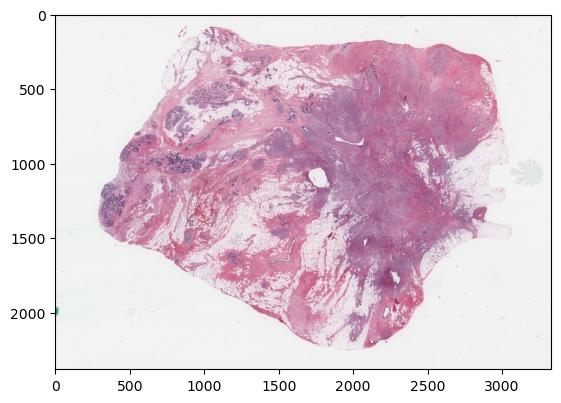

In [16]:
level = slide.level_count - 1
low_res_size = slide.level_dimensions[level]

# Read the entire slide at this resolution
low_res_image = slide.read_region((0, 0), level, low_res_size)

# Display the image
plt.imshow(low_res_image)
plt.show()